In [1]:
import tensorflow
import shap
import lime
import numpy
import pandas
import matplotlib
import seaborn
import tf_keras_vis

## Case study on Real-world Use Cases where ML model went badly wrong

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv("datasets/Loan_Pred.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.50      0.62        28
           1       0.82      0.96      0.88        68

    accuracy                           0.82        96
   macro avg       0.82      0.73      0.75        96
weighted avg       0.82      0.82      0.81        96



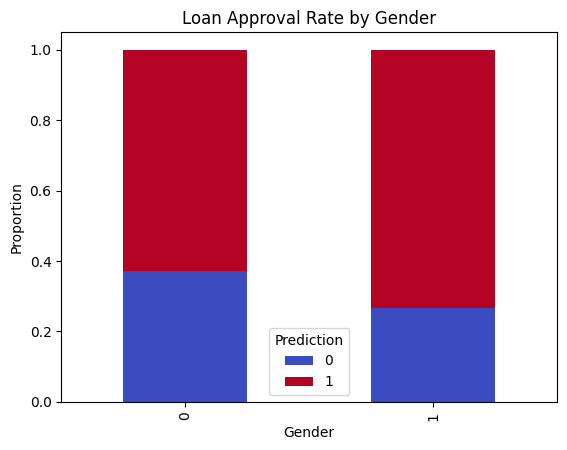

In [7]:
# Drop rows with missing values for simplicity
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Analyze bias: approval rate by gender
df['Prediction'] = model.predict(X)
approval_by_gender = df.groupby('Gender')['Prediction'].value_counts(normalize=True).unstack()
approval_by_gender.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Loan Approval Rate by Gender")
plt.ylabel("Proportion")
plt.show()


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


E:\Xai_Req_Setup\.jupyter_env\temp\ipykernel_11580\628967188.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
E:\Xai_Req_Setup\.jupyter_env\temp\ipykernel_11580\628967188.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       137
           1       0.72      0.69      0.70        86

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223



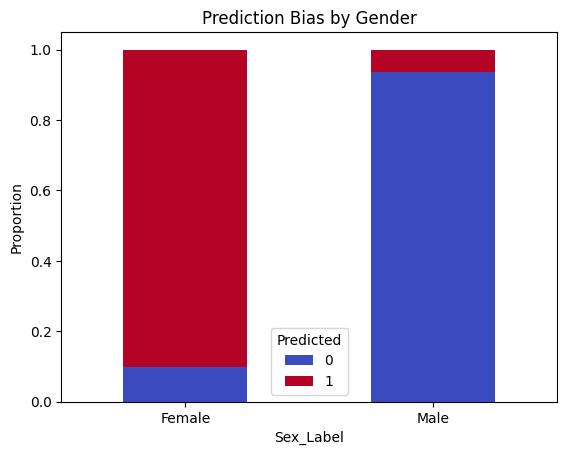

In [36]:
# STEP 1: Preprocessing
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# STEP 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# STEP 3: Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# STEP 4: Prediction & Evaluation
y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# STEP 5: Analyze Prediction Bias by Gender
# Add predicted values
df['Predicted'] = model.predict(X)

# Map numeric sex back to labels for clarity
df['Sex_Label'] = df['Sex'].map({0: 'Male', 1: 'Female'})

# Create proportion table and plot
bias_plot = df.groupby('Sex_Label')['Predicted'].value_counts(normalize=True).unstack()
bias_plot.plot(kind='bar', stacked=True, title="Prediction Bias by Gender", colormap='coolwarm')

plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()



## Perform Exploratory data analysis on structured, unstructured and image text data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

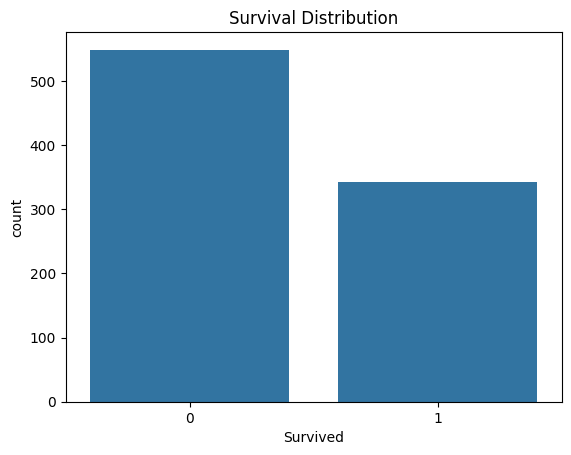

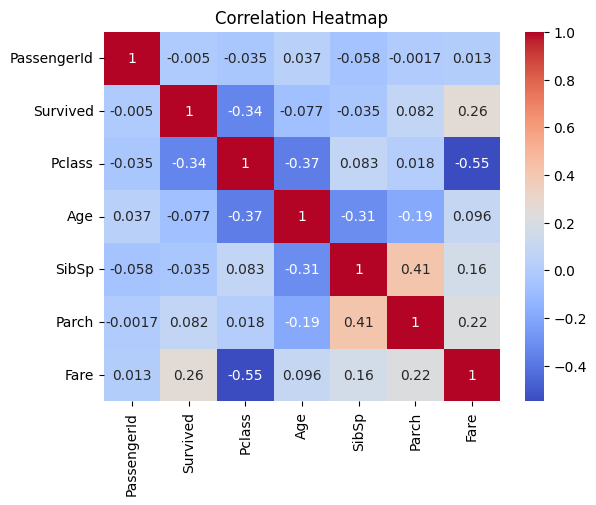

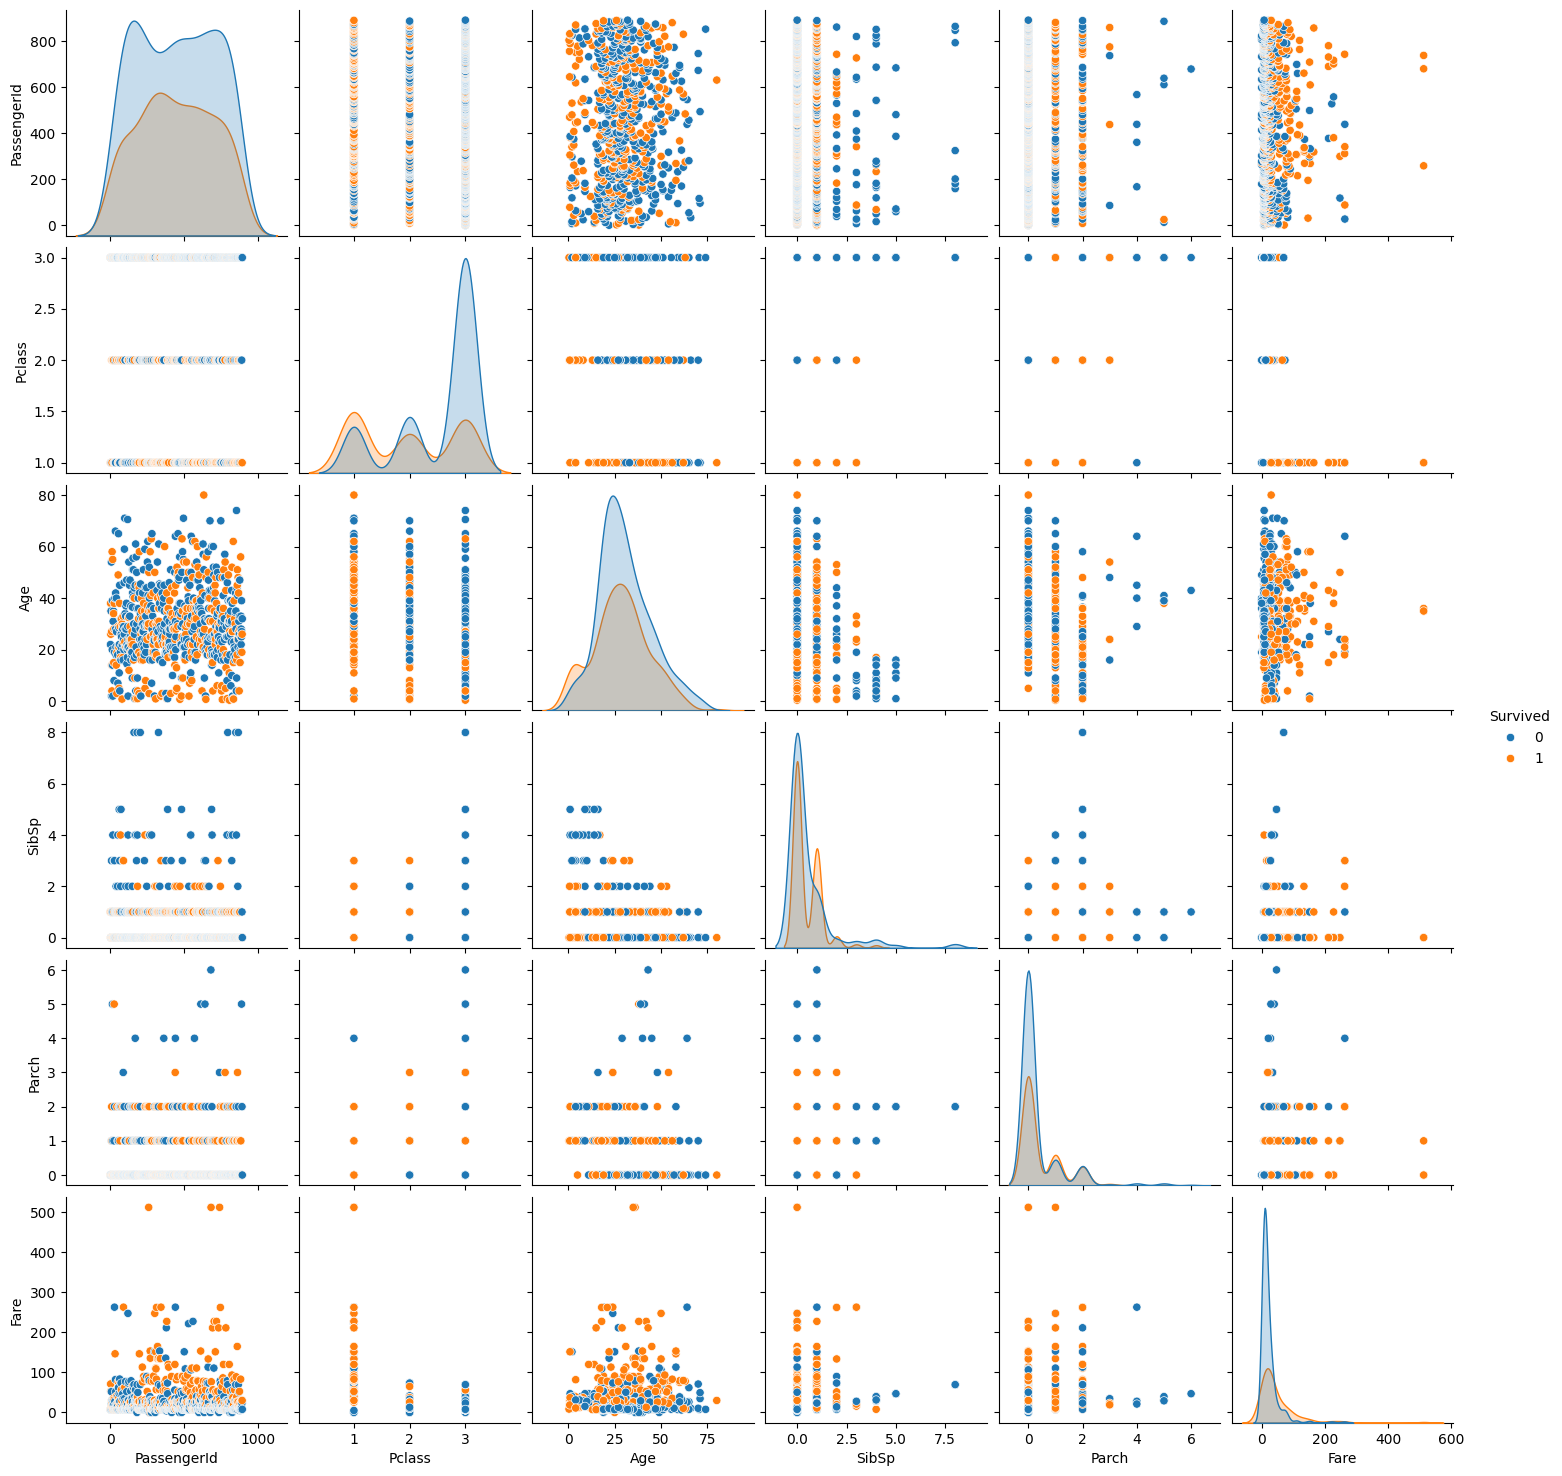

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("E:/Xai_Req_Setup/Notebooks/datasets/titanic.csv")

# Basic Info
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Target distribution
sns.countplot(data=df, x='Survived')
plt.title("Survival Distribution")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df.drop(columns=['Name', 'Ticket', 'Cabin']), hue='Survived')
plt.show()


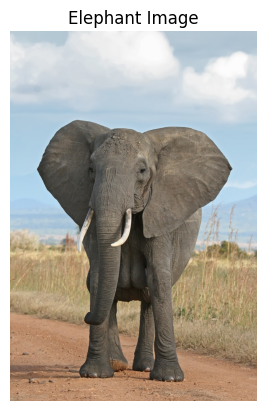

Shape: (1800, 1200, 3)
Pixel Range: 0 - 255


In [38]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open("E:/Xai_Req_Setup/Notebooks/datasets/elephant.jpg")
plt.imshow(img)
plt.title("Elephant Image")
plt.axis('off')
plt.show()

# Image stats
img_arr = np.array(img)
print("Shape:", img_arr.shape)
print("Pixel Range:", img_arr.min(), "-", img_arr.max())


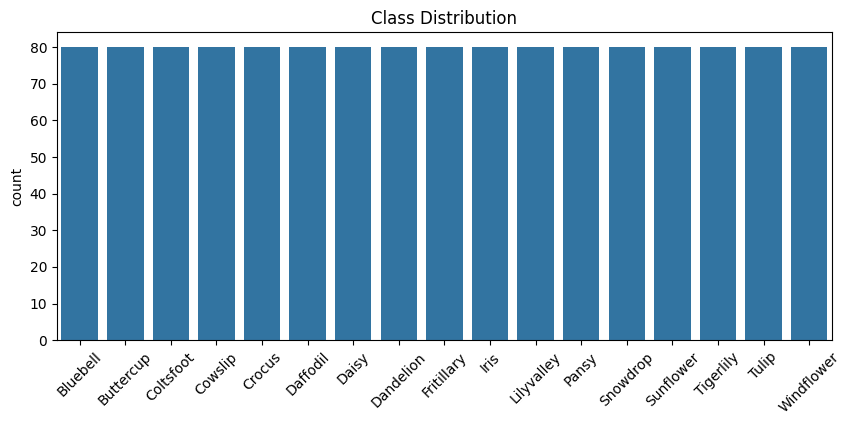

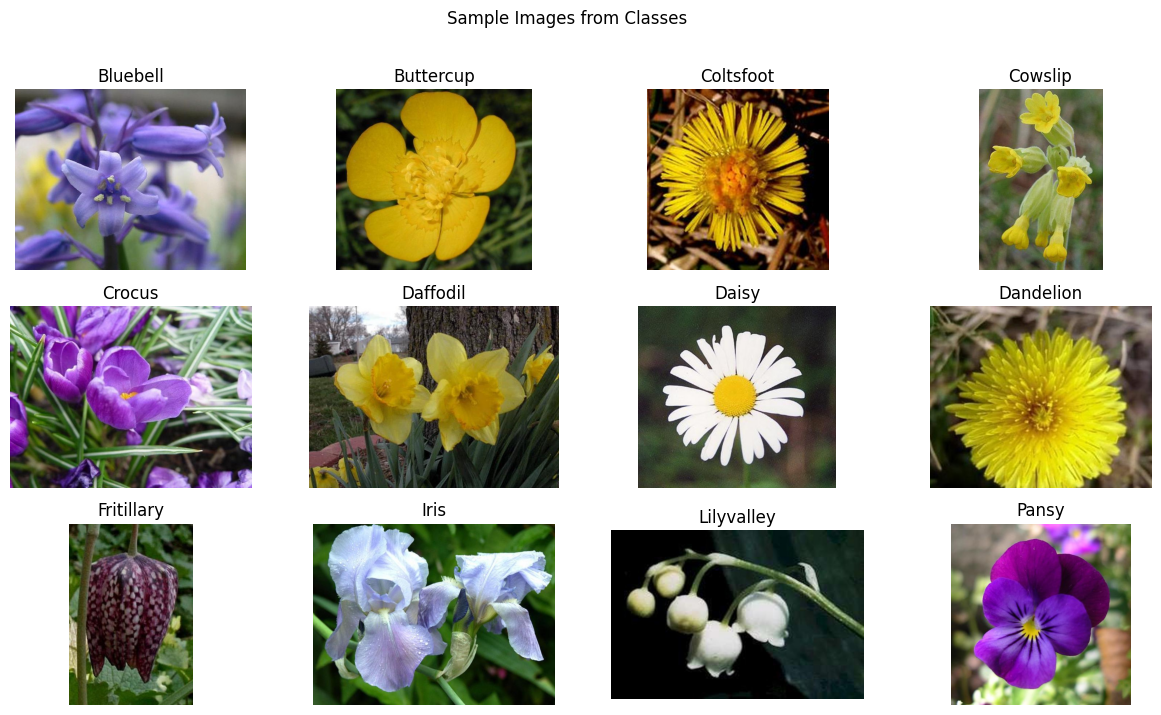

Image shape (H, W, C): (499, 635, 3)
Pixel Min: 0
Pixel Max: 255
Pixel Mean: 128.03432797353236
Pixel Std Dev: 52.312615174084755


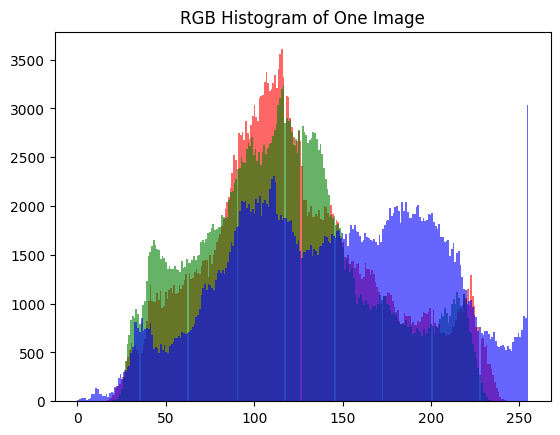

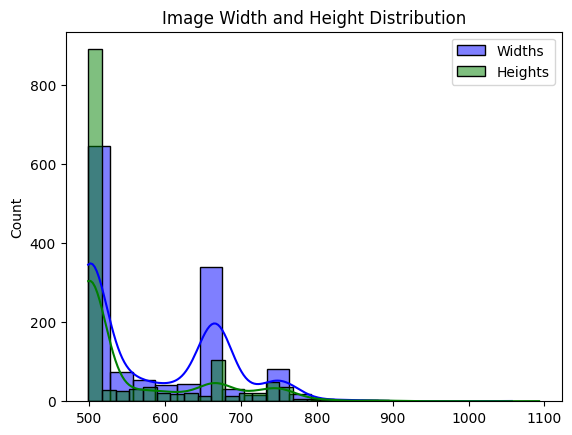

Bluebell: 80 images
Buttercup: 80 images
Coltsfoot: 80 images
Cowslip: 80 images
Crocus: 80 images
Daffodil: 80 images
Daisy: 80 images
Dandelion: 80 images
Fritillary: 80 images
Iris: 80 images
Lilyvalley: 80 images
Pansy: 80 images
Snowdrop: 80 images
Sunflower: 80 images
Tigerlily: 80 images
Tulip: 80 images
Windflower: 80 images


In [48]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load image paths
image_paths = glob.glob("E:/Xai_Req_Setup/Notebooks/datasets/Oxford 17 Flowers/*/*.jpg")
class_names = [path.split("\\")[-2] for path in image_paths]

# 1. Class Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x=class_names, order=sorted(set(class_names)))
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()

# 2. Sample Images
plt.figure(figsize=(15, 8))
for i, cls in enumerate(sorted(set(class_names))[:12]):
    img_path = [p for p in image_paths if cls in p][0]
    img = Image.open(img_path)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.suptitle("Sample Images from Classes")
plt.show()

# 3. Image Shape
sample_img = Image.open(image_paths[0])
img_array = np.array(sample_img)
print("Image shape (H, W, C):", img_array.shape)

# 4. Pixel Statistics
print("Pixel Min:", img_array.min())
print("Pixel Max:", img_array.max())
print("Pixel Mean:", img_array.mean())
print("Pixel Std Dev:", img_array.std())

# 5. RGB Histogram of One Image
colors = ['r', 'g', 'b']
plt.figure()
for i, color in enumerate(colors):
    plt.hist(img_array[:, :, i].flatten(), bins=256, color=color, alpha=0.6)
plt.title("RGB Histogram of One Image")
plt.show()

# 6. Image Size Distribution
sizes = [Image.open(p).size for p in image_paths]
widths, heights = zip(*sizes)
plt.figure()
sns.histplot(widths, kde=True, color='blue', label='Widths')
sns.histplot(heights, kde=True, color='green', label='Heights')
plt.legend()
plt.title("Image Width and Height Distribution")
plt.show()

# 7. Number of Images per Class
from collections import Counter
count_per_class = Counter(class_names)
for cls, count in sorted(count_per_class.items()):
    print(f"{cls}: {count} images")


  Class                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


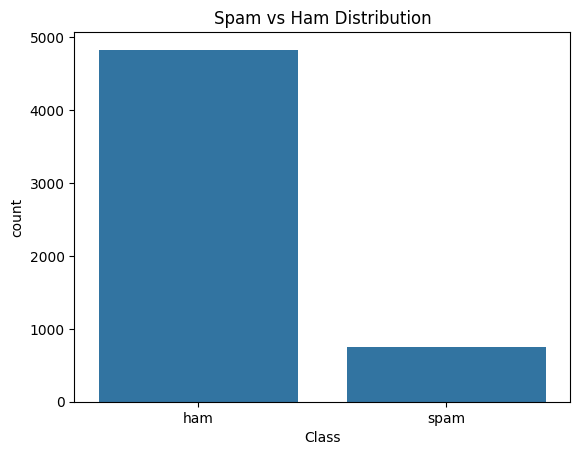

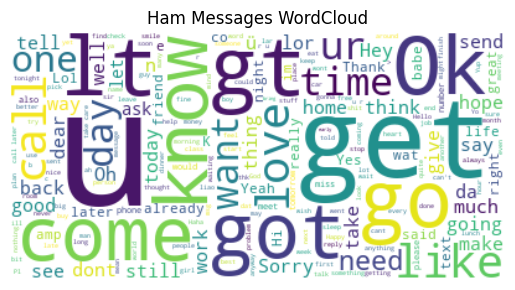

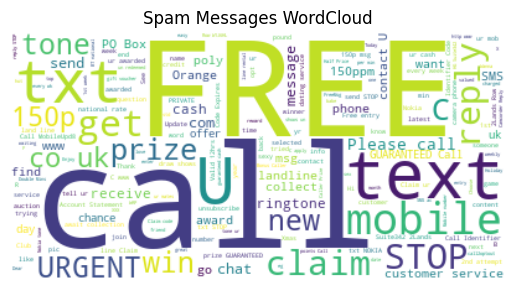


Missing Values:
Class      0
Message    0
dtype: int64

Class Distribution:
Class
ham     4827
spam     747
Name: count, dtype: int64

Shape of the Dataset: (5574, 2)

Message Length Stats:
count    5574.000000
mean       80.445282
std        59.841841
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: Message_Length, dtype: float64


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# Load spam/ham dataset
df = pd.read_csv("datasets/Spam_SMS.csv")  # Replace with your actual dataset path

# Display sample data
print(df.head())

# 1. Are the classes balanced or imbalanced?
sns.countplot(data=df, x='Class')  # Assuming 'Class' column contains 'spam' or 'ham'
plt.title("Spam vs Ham Distribution")
plt.show()

# 2. Word cloud for ham messages
ham_text = ' '.join(df[df['Class'] == 'ham']['Message'])  # Assuming 'Message' contains the text
ham_text = re.sub(r'<.*?>', '', ham_text)  # Remove HTML tags if present
ham_wordcloud = WordCloud(stopwords=set(stopwords.words('english')),
                           background_color='white').generate(ham_text)

plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ham Messages WordCloud")
plt.show()

# 3. Word cloud for spam messages
spam_text = ' '.join(df[df['Class'] == 'spam']['Message'])  # Assuming 'Message' contains the text
spam_text = re.sub(r'<.*?>', '', spam_text)  # Remove HTML tags if present
spam_wordcloud = WordCloud(stopwords=set(stopwords.words('english')),
                            background_color='white').generate(spam_text)

plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Spam Messages WordCloud")
plt.show()

# 4. Basic Statistical Information on the Messages
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for class distribution balance
print("\nClass Distribution:")
print(df['Class'].value_counts())

# Shape of the dataset
print("\nShape of the Dataset:", df.shape)

# Basic statistics (min, max, mean, and standard deviation for message length)
df['Message_Length'] = df['Message'].apply(len)
print("\nMessage Length Stats:")
print(df['Message_Length'].describe())


  Class                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Missing Values:
 Class      0
Message    0
dtype: int64


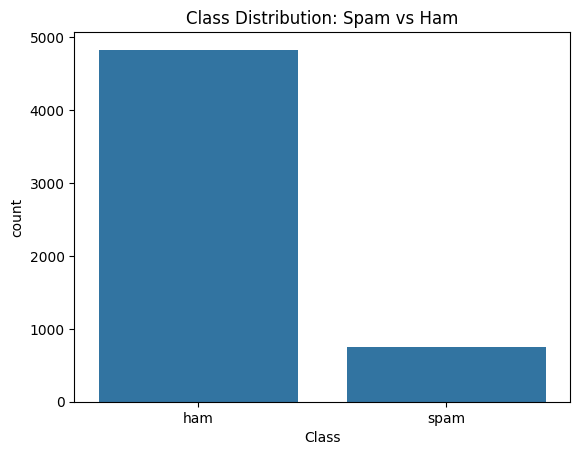

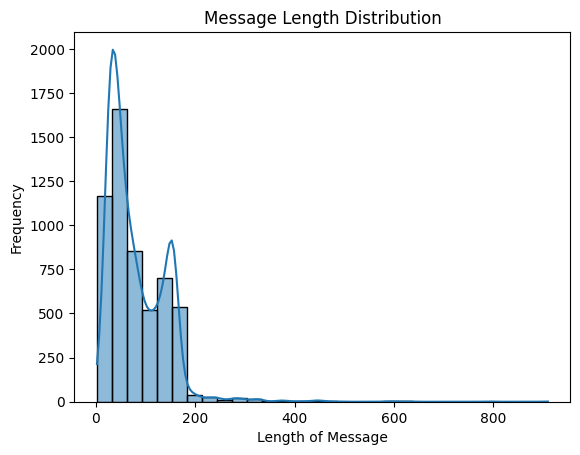

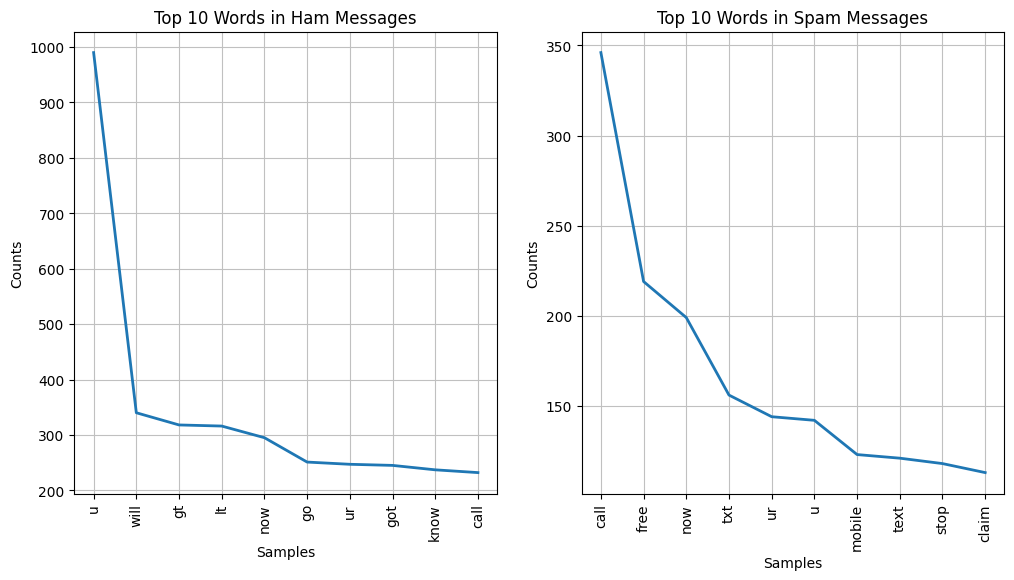

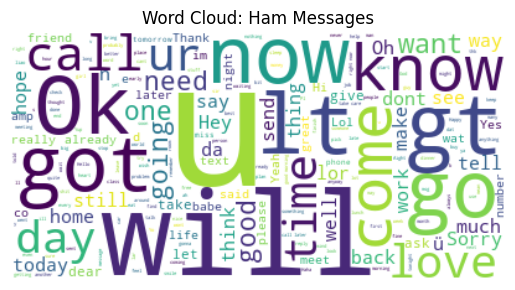

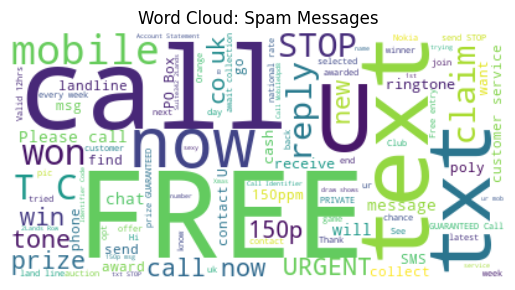

Duplicate Messages:
      Class                                            Message  Message_Length
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...             155
7      ham  As per your request 'Melle Melle (Oru Minnamin...             160
8     spam  WINNER!! As a valued network customer you have...             157
9     spam  Had your mobile 11 months or more? U R entitle...             154
11    spam  SIX chances to win CASH! From 100 to 20,000 po...             136
...    ...                                                ...             ...
5526  spam  You are awarded a SiPix Digital Camera! call 0...             152
5537   ham  I know you are thinkin malaria. But relax, chi...             329
5541   ham                         Just sleeping..and surfing              26
5555   ham                        Hahaha..use your brain dear              27
5560   ham                             Sorry, I'll call later              22

[705 rows x 3 columns]


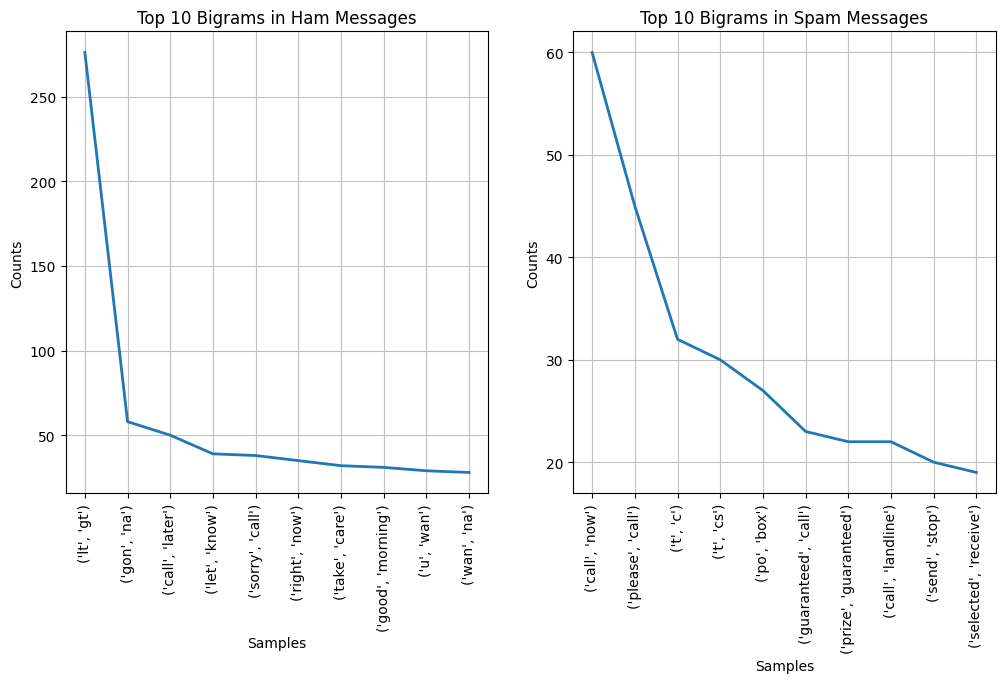

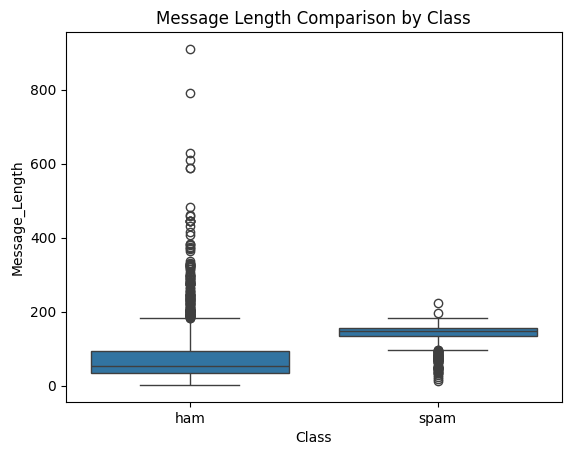

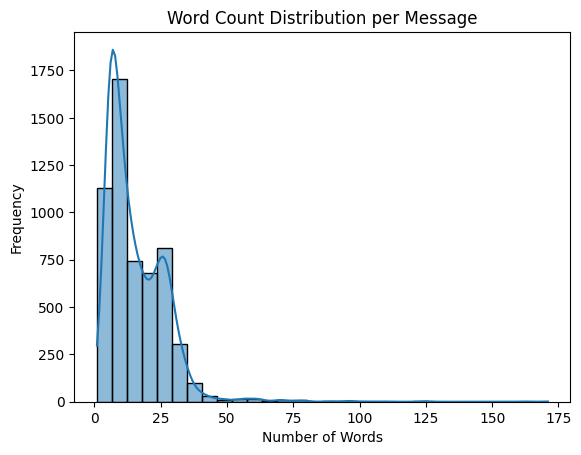

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re

# Load spam/ham dataset
df = pd.read_csv("datasets/Spam_SMS.csv")  # Replace with your actual dataset path

# Sample data
print(df.head())

# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Class distribution
sns.countplot(data=df, x='Class')
plt.title("Class Distribution: Spam vs Ham")
plt.show()

# 3. Text Length Distribution
df['Message_Length'] = df['Message'].apply(len)
sns.histplot(df['Message_Length'], bins=30, kde=True)
plt.title("Message Length Distribution")
plt.xlabel("Length of Message")
plt.ylabel("Frequency")
plt.show()

# 4. Top N Most Common Words in Ham vs Spam Messages
stop_words = set(STOPWORDS)
ham_words = ' '.join(df[df['Class'] == 'ham']['Message'])
spam_words = ' '.join(df[df['Class'] == 'spam']['Message'])

# Tokenization
ham_tokens = word_tokenize(ham_words.lower())
spam_tokens = word_tokenize(spam_words.lower())

# Remove stop words and non-alphabetic tokens
ham_tokens = [word for word in ham_tokens if word not in stop_words and word.isalpha()]
spam_tokens = [word for word in spam_tokens if word not in stop_words and word.isalpha()]

# Frequency distribution
ham_freq = FreqDist(ham_tokens)
spam_freq = FreqDist(spam_tokens)

# Plotting the top 10 most common words
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ham_freq.plot(10, title="Top 10 Words in Ham Messages")
plt.subplot(1, 2, 2)
spam_freq.plot(10, title="Top 10 Words in Spam Messages")
plt.show()

# 5. Word Cloud for Spam and Ham Messages
ham_wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(ham_words)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Ham Messages")
plt.show()

spam_wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(spam_words)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Spam Messages")
plt.show()

# 6. Check for duplicate messages
duplicate_messages = df[df.duplicated(subset='Message', keep=False)]
print("Duplicate Messages:\n", duplicate_messages)

# 7. Top N Most Frequent Bigrams in Ham and Spam Messages
from nltk import ngrams

# Create bigrams for ham and spam
ham_bigrams = list(ngrams(ham_tokens, 2))
spam_bigrams = list(ngrams(spam_tokens, 2))

# Frequency distribution of bigrams
ham_bigram_freq = FreqDist(ham_bigrams)
spam_bigram_freq = FreqDist(spam_bigrams)

# Plotting the top 10 bigrams
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ham_bigram_freq.plot(10, title="Top 10 Bigrams in Ham Messages")
plt.subplot(1, 2, 2)
spam_bigram_freq.plot(10, title="Top 10 Bigrams in Spam Messages")
plt.show()

# 8. Message Length by Class
sns.boxplot(data=df, x='Class', y='Message_Length')
plt.title("Message Length Comparison by Class")
plt.show()

# 9. Word Count Distribution per Message
df['Word_Count'] = df['Message'].apply(lambda x: len(str(x).split()))
sns.histplot(df['Word_Count'], bins=30, kde=True)
plt.title("Word Count Distribution per Message")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# 10. Sentiment Distribution Over Time (If Date Provided)
# Assuming there is a 'Date' column in the dataset
# If not available, skip this step or comment out the following lines.
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    messages_per_day = df.groupby(df['Date'].dt.date)['Class'].value_counts().unstack()
    messages_per_day.plot(kind='line', figsize=(12, 6))
    plt.title("Messages Sentiment Distribution Over Time")
    plt.ylabel("Number of Messages")
    plt.xlabel("Date")
    plt.legend(title="Class")
    plt.show()
